In [ ]:
import pandas as pd
import numpy as np

from pylab import rcParams
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [ ]:
#Connect to google drive where data is stored
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/global_food_prices.csv")

<ipython-input-3-f00fa51b0c59>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/dataset/global_food_prices.csv")


In [ ]:
df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050638 entries, 0 to 2050637
Data columns (total 18 columns):
 #   Column              Dtype  
---  ------              -----  
 0   adm0_id             float64
 1   adm0_name           object 
 2   adm1_id             int64  
 3   adm1_name           object 
 4   mkt_id              int64  
 5   mkt_name            object 
 6   cm_id               int64  
 7   cm_name             object 
 8   cur_id              float64
 9   cur_name            object 
 10  pt_id               int64  
 11  pt_name             object 
 12  um_id               int64  
 13  um_name             object 
 14  mp_month            int64  
 15  mp_year             int64  
 16  mp_price            float64
 17  mp_commoditysource  float64
dtypes: float64(4), int64(7), object(7)
memory usage: 281.6+ MB


In [ ]:
df.describe()

,adm0_id,adm1_id,mkt_id,cm_id,cur_id,pt_id,um_id,mp_month,mp_year,mp_price,mp_commoditysource
count,2.050638e+06,2.050638e+06,2.050638e+06,2.050638e+06,2050638.0,2.050638e+06,2.050638e+06,2.050638e+06,2.050638e+06,2.050638e+06,0.0
mean,1.004064e+03,2.631071e+04,1.591207e+03,2.201166e+02,0.0,1.491768e+01,1.486924e+01,6.363021e+00,2.016131e+03,6.413984e+03,NaN
std,7.163519e+03,1.159529e+05,1.181314e+03,1.938963e+02,0.0,2.831222e-01,2.598690e+01,3.403189e+00,4.458825e+00,1.069772e+05,NaN
min,1.000000e+00,0.000000e+00,8.000000e+01,5.000000e+01,0.0,1.400000e+01,5.000000e+00,1.000000e+00,1.990000e+03,0.000000e+00,NaN
25%,1.050000e+02,1.510000e+03,6.440000e+02,7.300000e+01,0.0,1.500000e+01,5.000000e+00,3.000000e+00,2.014000e+03,4.500000e+01,NaN
50%,1.500000e+02,2.156000e+03,1.441000e+03,1.410000e+02,0.0,1.500000e+01,5.000000e+00,6.000000e+00,2.017000e+03,2.465558e+02,NaN
75%,2.050000e+02,3.433000e+03,2.331000e+03,3.030000e+02,0.0,1.500000e+01,9.000000e+00,9.000000e+00,2.020000e+03,1.200000e+03,NaN
max,7.000100e+04,9.000220e+05,6.083000e+03,8.930000e+02,0.0,1.800000e+01,1.750000e+02,1.200000e+01,2.021000e+03,2.177778e+07,NaN


In [ ]:
df.isnull().sum()

adm0_id                     0
adm0_name                   0
adm1_id                     0
adm1_name              611016
mkt_id                      0
mkt_name                    0
cm_id                       0
cm_name                     0
cur_id                      0
cur_name                    0
pt_id                       0
pt_name                     0
um_id                       0
um_name                     0
mp_month                    0
mp_year                     0
mp_price                    0
mp_commoditysource    2050638
dtype: int64

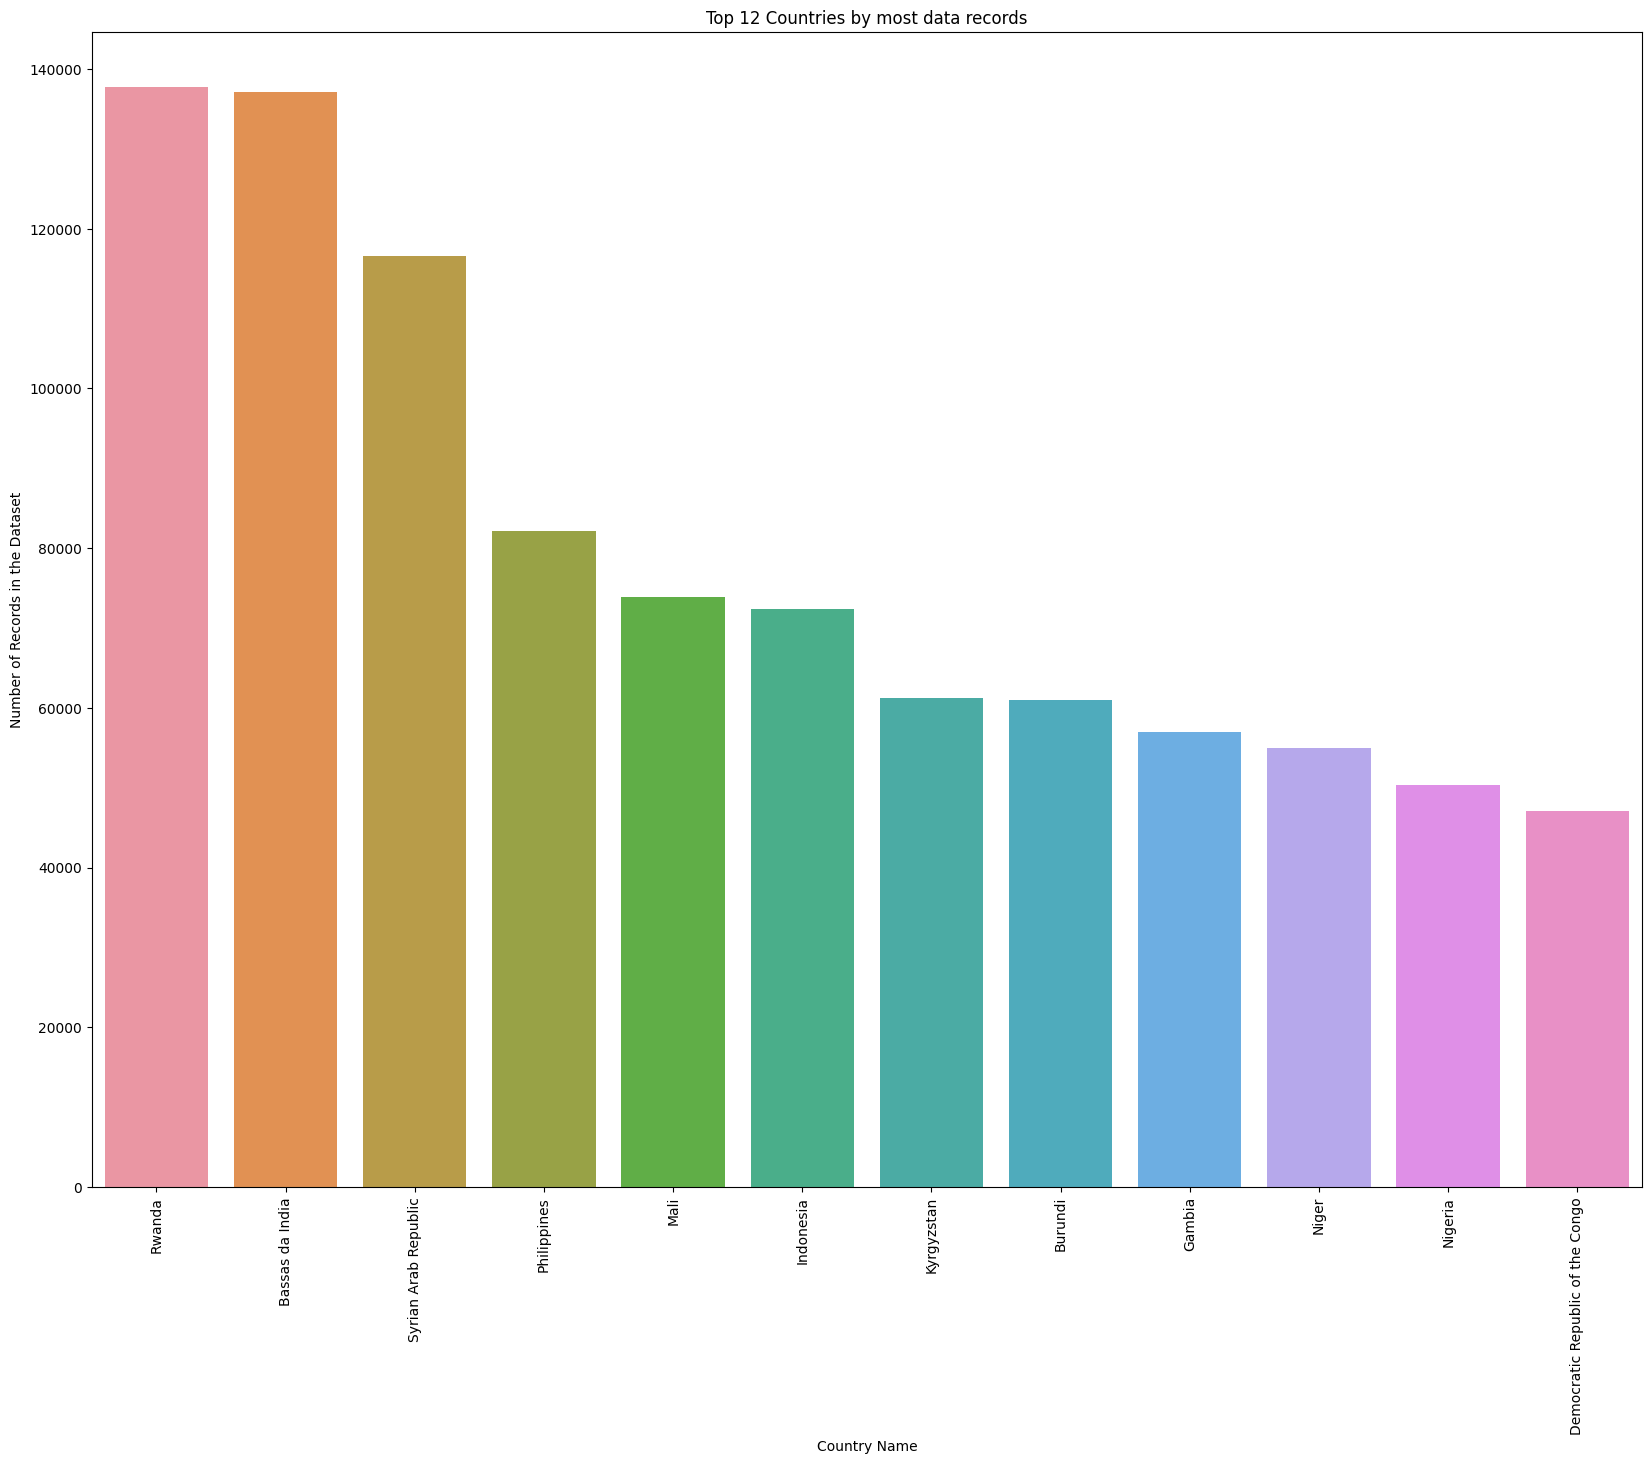

In [ ]:
# Top 12 Countries with most records available

fig, ax = plt.subplots(1, 1, figsize=(20, 15), sharex=True)
top_20_df = df[["adm0_id", "adm0_name"]].groupby("adm0_name").agg(['count'])["adm0_id"]['count'].sort_values(ascending=False)[:12]
fig = sns.barplot( x = top_20_df.index, y = top_20_df.values, ax = ax)
fig.set_xticklabels(labels=top_20_df.index , rotation=90)
fig.set_ylabel("Number of Records in the Dataset")
fig.set_xlabel("Country Name")
fig.set_title("Top 12 Countries by most data records");

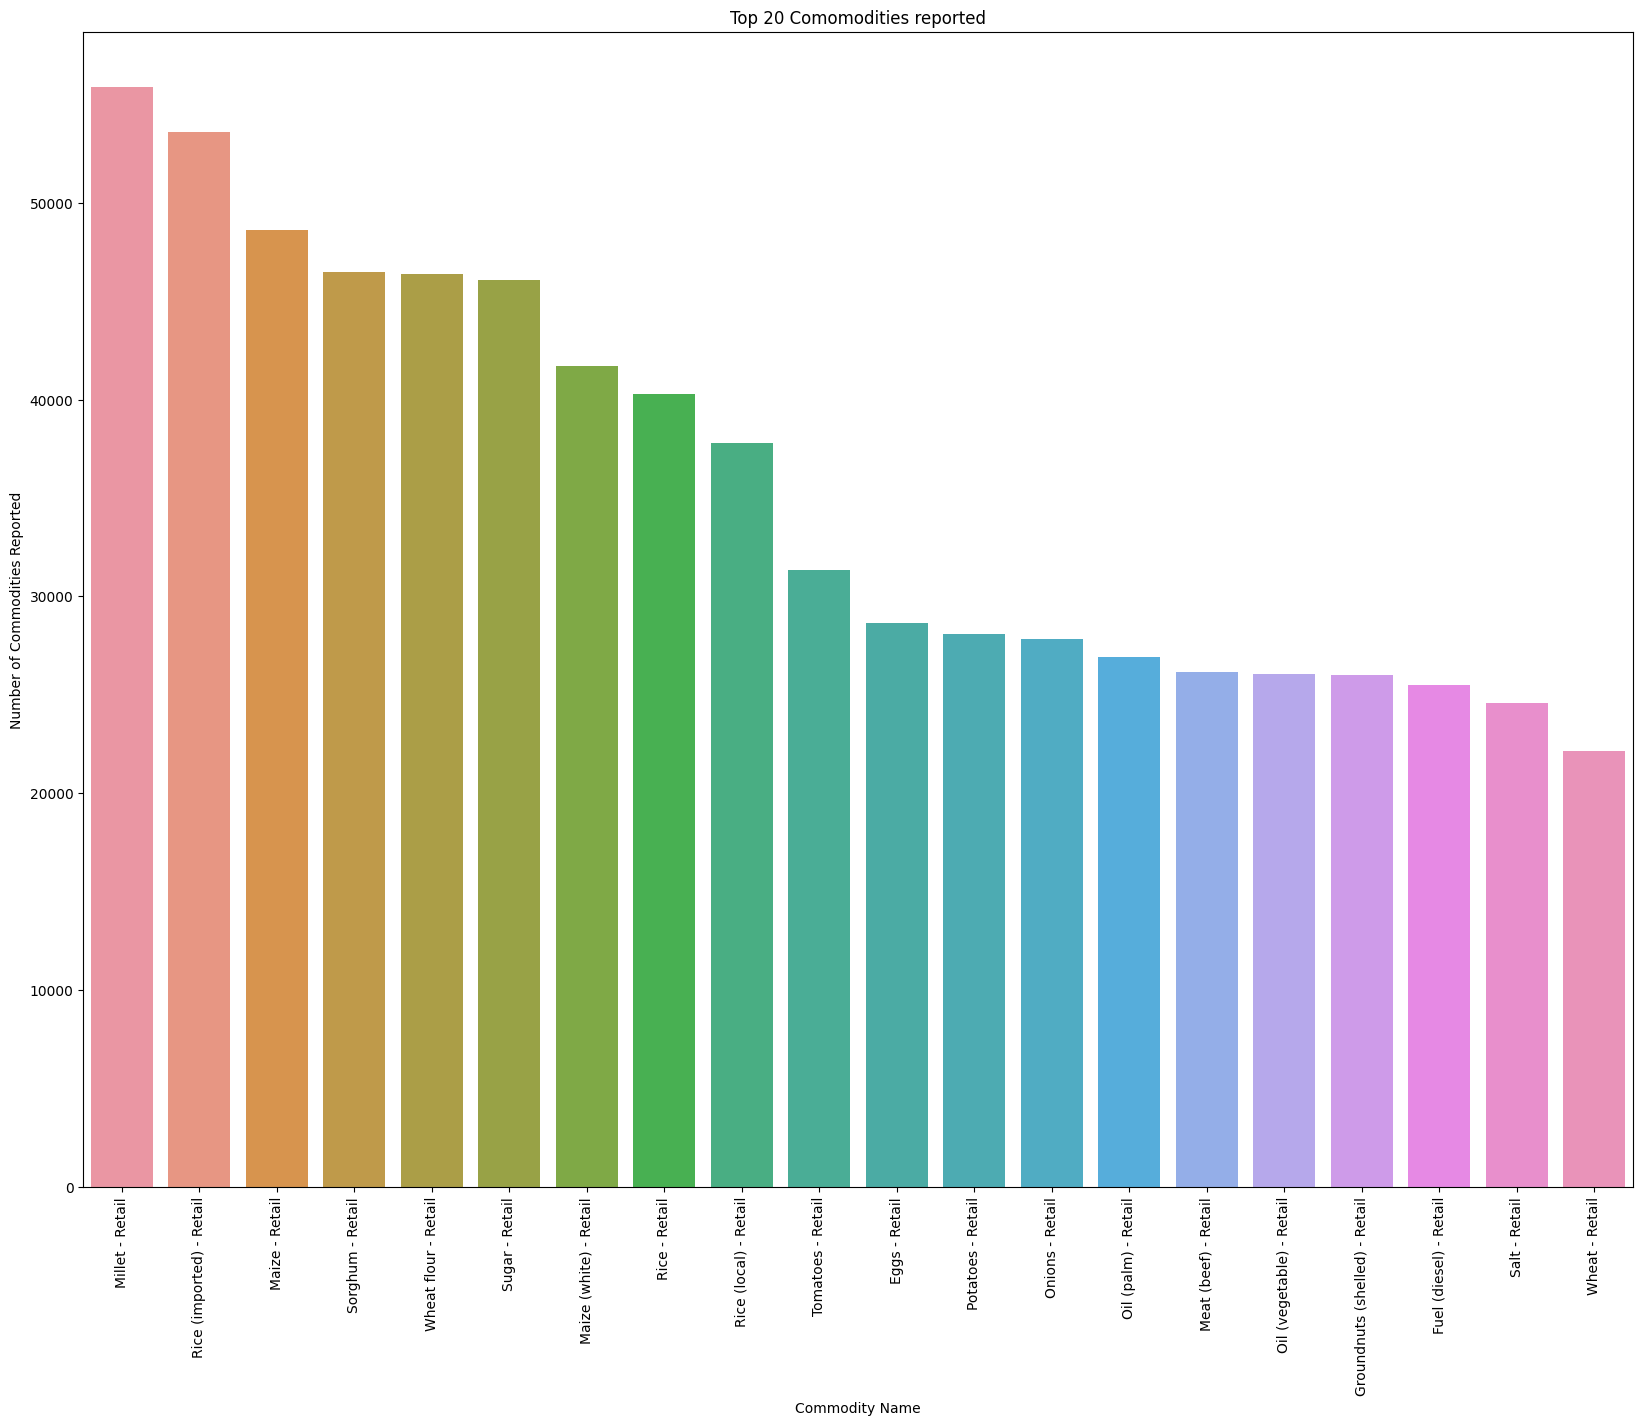

In [ ]:
# Top 20 most reported commodity

fig, ax = plt.subplots(1, 1, figsize=(20, 15), sharex=True)
top_20_df = df[["adm0_id", "cm_name"]].groupby("cm_name").agg(['count'])["adm0_id"]['count'].sort_values(ascending=False)[:20]
fig = sns.barplot( x = top_20_df.index, y = top_20_df.values, ax=ax)
fig.set_xticklabels(labels=top_20_df.index , rotation=90)
fig.set_ylabel("Number of Commodities Reported")
fig.set_xlabel("Commodity Name")
fig.set_title("Top 20 Comomodities reported");

Food price Data Visualization for Nigeria

In [ ]:
df["adm0_name"].unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Bassas da India', 'Belarus', 'Benin',
       'Bhutan', 'Bolivia', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad',
       'China', 'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Democratic Republic of the Congo', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea',
       'Ethiopia', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Indonesia',
       'Iran  (Islamic Republic of)', 'Iraq', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mexico', 'Moldova Republic of', 'Mongolia', 'Mozambique',
       'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria',
  

In [ ]:
df_nigeria = df[df["adm0_name"] == "Nigeria"]

In [ ]:
# Create a Date Column
df_nigeria["Date"] = [  y+ " " +x for x,y in list(zip(df_nigeria["mp_month"].astype(str).values, df_nigeria["mp_year"].astype(str).values)) ]
df_nigeria["Date"] = pd.to_datetime(df_nigeria["Date"])

<ipython-input-12-40831337338b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nigeria["Date"] = [  y+ " " +x for x,y in list(zip(df_nigeria["mp_month"].astype(str).values, df_nigeria["mp_year"].astype(str).values)) ]
<ipython-input-12-40831337338b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nigeria["Date"] = pd.to_datetime(df_nigeria["Date"])


In [ ]:
df_nigeria.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,Date
1301729,182.0,Nigeria,2211,Adamawa,1980,Mubi,55,Bread - Retail,0.0,NGN,15,Retail,33,Unit,1,2015,140.0,NaN,2015-01-01
1301730,182.0,Nigeria,2211,Adamawa,1980,Mubi,55,Bread - Retail,0.0,NGN,15,Retail,33,Unit,2,2015,140.0,NaN,2015-02-01
1301731,182.0,Nigeria,2211,Adamawa,1980,Mubi,55,Bread - Retail,0.0,NGN,15,Retail,33,Unit,3,2015,140.0,NaN,2015-03-01
1301732,182.0,Nigeria,2211,Adamawa,1980,Mubi,55,Bread - Retail,0.0,NGN,15,Retail,33,Unit,4,2015,140.0,NaN,2015-04-01
1301733,182.0,Nigeria,2211,Adamawa,1980,Mubi,55,Bread - Retail,0.0,NGN,15,Retail,33,Unit,5,2015,140.0,NaN,2015-05-01


In [ ]:
df_nigeria.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50285 entries, 1301729 to 1352013
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   adm0_id             50285 non-null  float64       
 1   adm0_name           50285 non-null  object        
 2   adm1_id             50285 non-null  int64         
 3   adm1_name           50285 non-null  object        
 4   mkt_id              50285 non-null  int64         
 5   mkt_name            50285 non-null  object        
 6   cm_id               50285 non-null  int64         
 7   cm_name             50285 non-null  object        
 8   cur_id              50285 non-null  float64       
 9   cur_name            50285 non-null  object        
 10  pt_id               50285 non-null  int64         
 11  pt_name             50285 non-null  object        
 12  um_id               50285 non-null  int64         
 13  um_name             50285 non-null  ob

In [ ]:
df_nigeria.describe()

,adm0_id,adm1_id,mkt_id,cm_id,cur_id,pt_id,um_id,mp_month,mp_year,mp_price,mp_commoditysource
count,50285.0,50285.000000,50285.000000,50285.000000,50285.0,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,0.0
mean,182.0,7608.987352,2119.857751,193.846157,0.0,14.654728,49.466402,6.431878,2017.756587,4936.723963,NaN
std,0.0,17682.285264,317.648064,169.764113,0.0,0.475462,55.258262,3.513437,2.750766,8823.645362,NaN
min,182.0,2211.000000,1037.000000,51.000000,0.0,14.000000,5.000000,1.000000,2002.000000,5.000000,NaN
25%,182.0,2216.000000,1974.000000,71.000000,0.0,14.000000,9.000000,3.000000,2017.000000,187.574000,NaN
50%,182.0,2226.000000,1981.000000,114.000000,0.0,15.000000,15.000000,6.000000,2018.000000,400.000000,NaN
75%,182.0,2240.000000,2392.000000,284.000000,0.0,15.000000,71.000000,10.000000,2020.000000,6900.000000,NaN
max,182.0,65710.000000,3073.000000,716.000000,0.0,15.000000,161.000000,12.000000,2021.000000,90000.000000,NaN


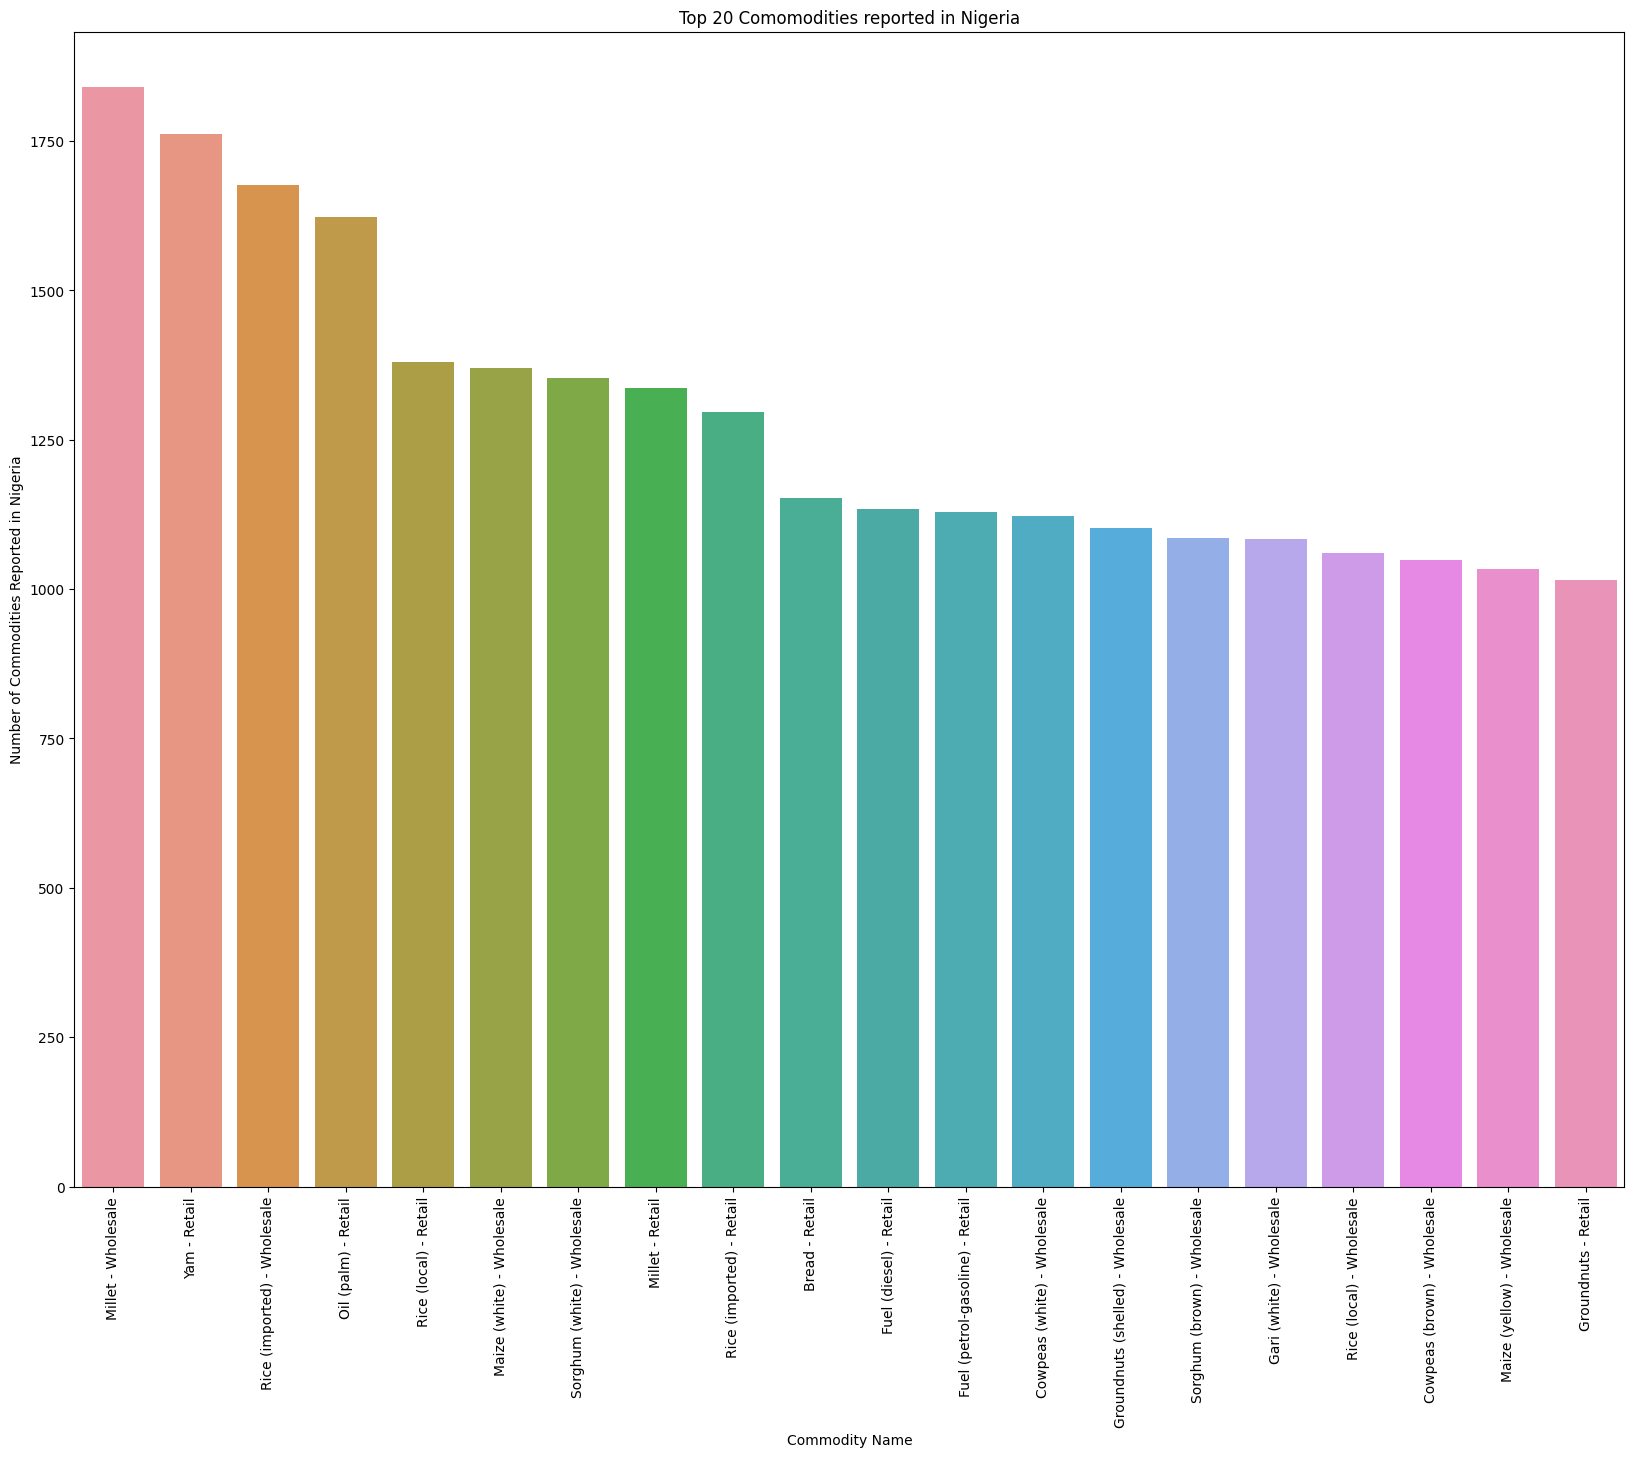

In [ ]:
# Top 20 most reported commodity in Nigeria

fig, ax = plt.subplots(1, 1, figsize=(20, 15), sharex=True)
top_20_df = df_nigeria[["adm0_id", "cm_name"]].groupby("cm_name").agg(['count'])["adm0_id"]['count'].sort_values(ascending=False)[:20]
fig = sns.barplot( x = top_20_df.index, y = top_20_df.values, ax=ax)
fig.set_xticklabels(labels=top_20_df.index , rotation=90)
fig.set_ylabel("Number of Commodities Reported in Nigeria")
fig.set_xlabel("Commodity Name")
fig.set_title("Top 20 Comomodities reported in Nigeria")

In [ ]:
df_nigeria = df_nigeria.set_index("Date")

<ipython-input-18-2ddcc73dd295>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  usd_month = df_nigeria.resample("M").mean()


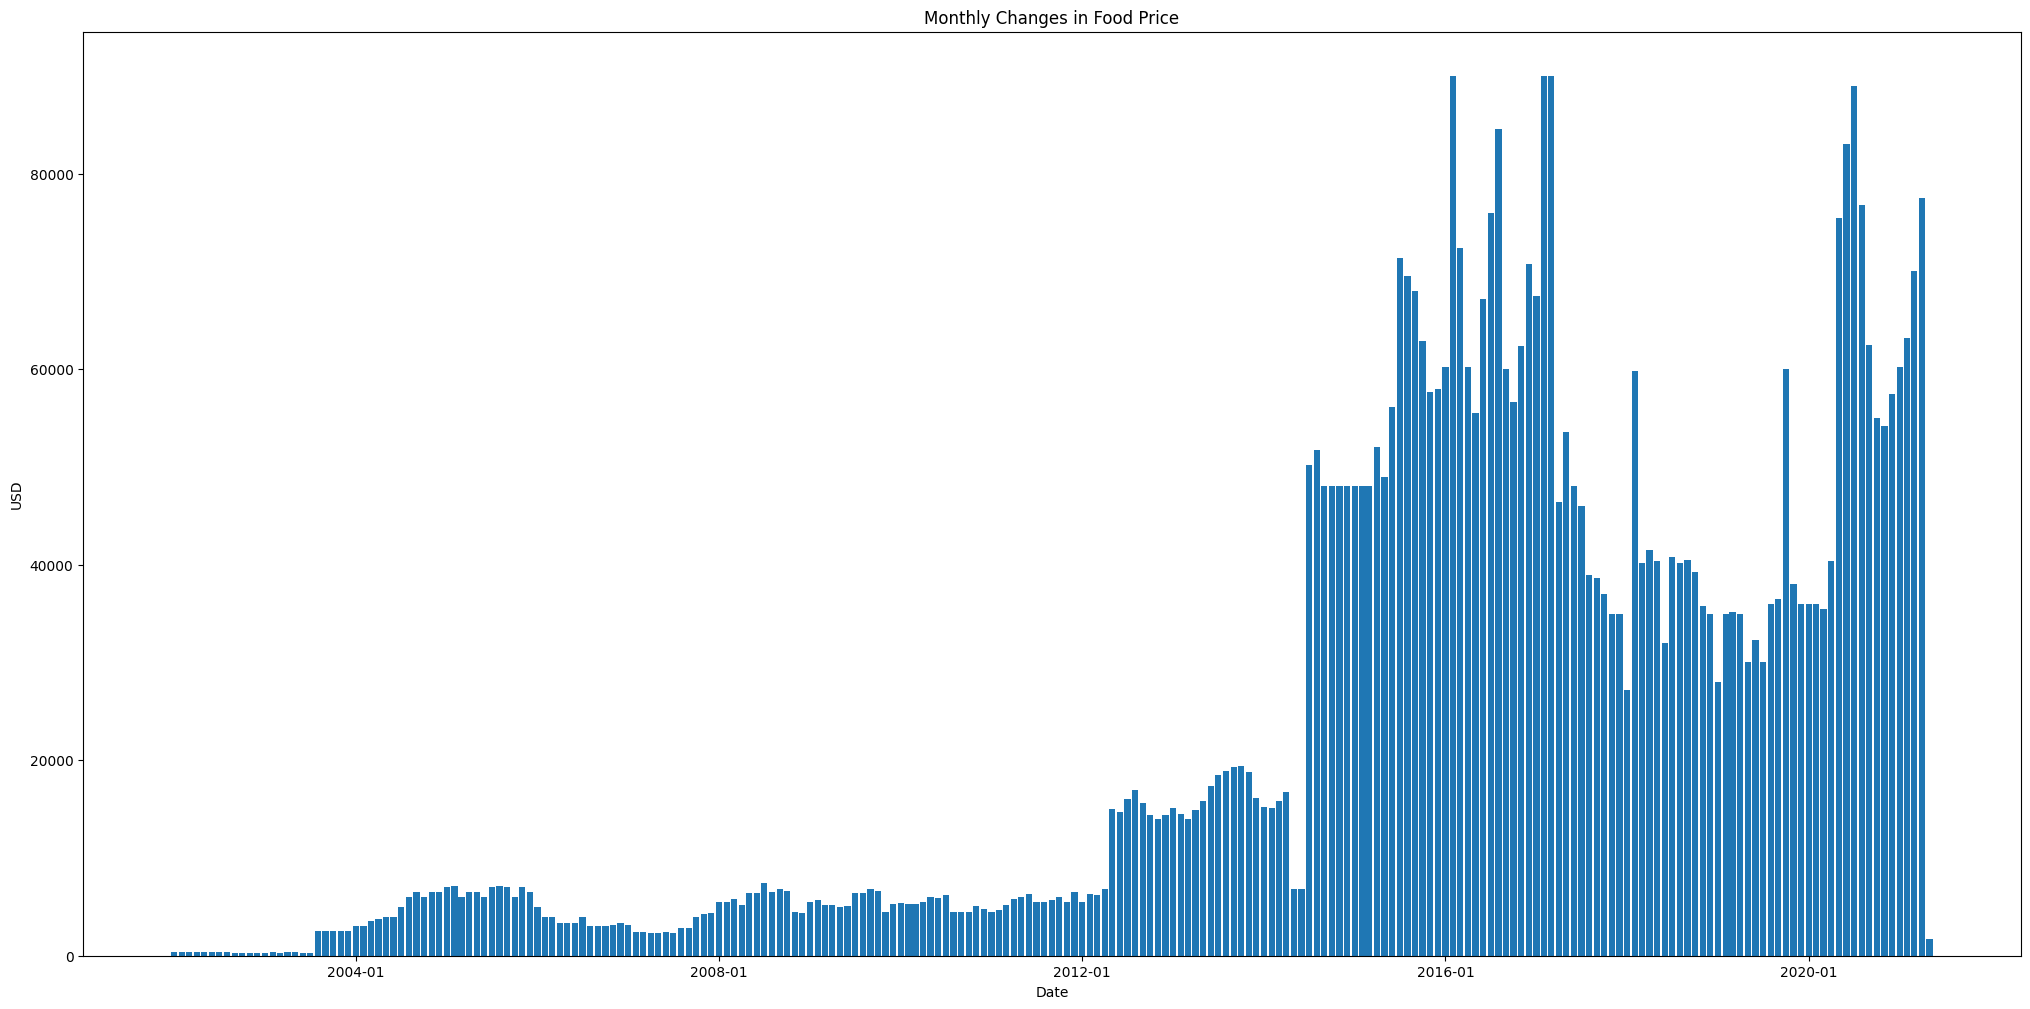

In [ ]:
# Analyze the Monthly Change in mp_price
usd_month = df_nigeria.resample("M").mean()
fig, ax = plt.subplots(figsize=(25, 12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.bar(df_nigeria.index, df_nigeria["mp_price"], width=25, align='center')
ax.set_ylabel("USD")
ax.set_xlabel('Date')
ax.set_title("Monthly Changes in Food Price")

In [ ]:
# Monthly and weekly sampling for last two years
df_month= df_nigeria.loc['2019-01-01':'2021-01-01'].resample("M").mean()
df_week = df_nigeria.loc['2019-01-01':'2021-01-01'].resample("W").mean()

<ipython-input-19-4eb5323653e2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_month= df_nigeria.loc['2019-01-01':'2021-01-01'].resample("M").mean()
<ipython-input-19-4eb5323653e2>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_week = df_nigeria.loc['2019-01-01':'2021-01-01'].resample("W").mean()


In [ ]:
df_nigeria_buhari = df_nigeria[(df_nigeria.index >= '2014-01-01') & (df_nigeria.index <= '2021-01-01')]

<ipython-input-25-259c808f760b>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  usd_month = df_nigeria_buhari.resample("M").mean()


Text(0.5, 1.0, "Monthly Changes in Food Price before and During Buhari's Regime")

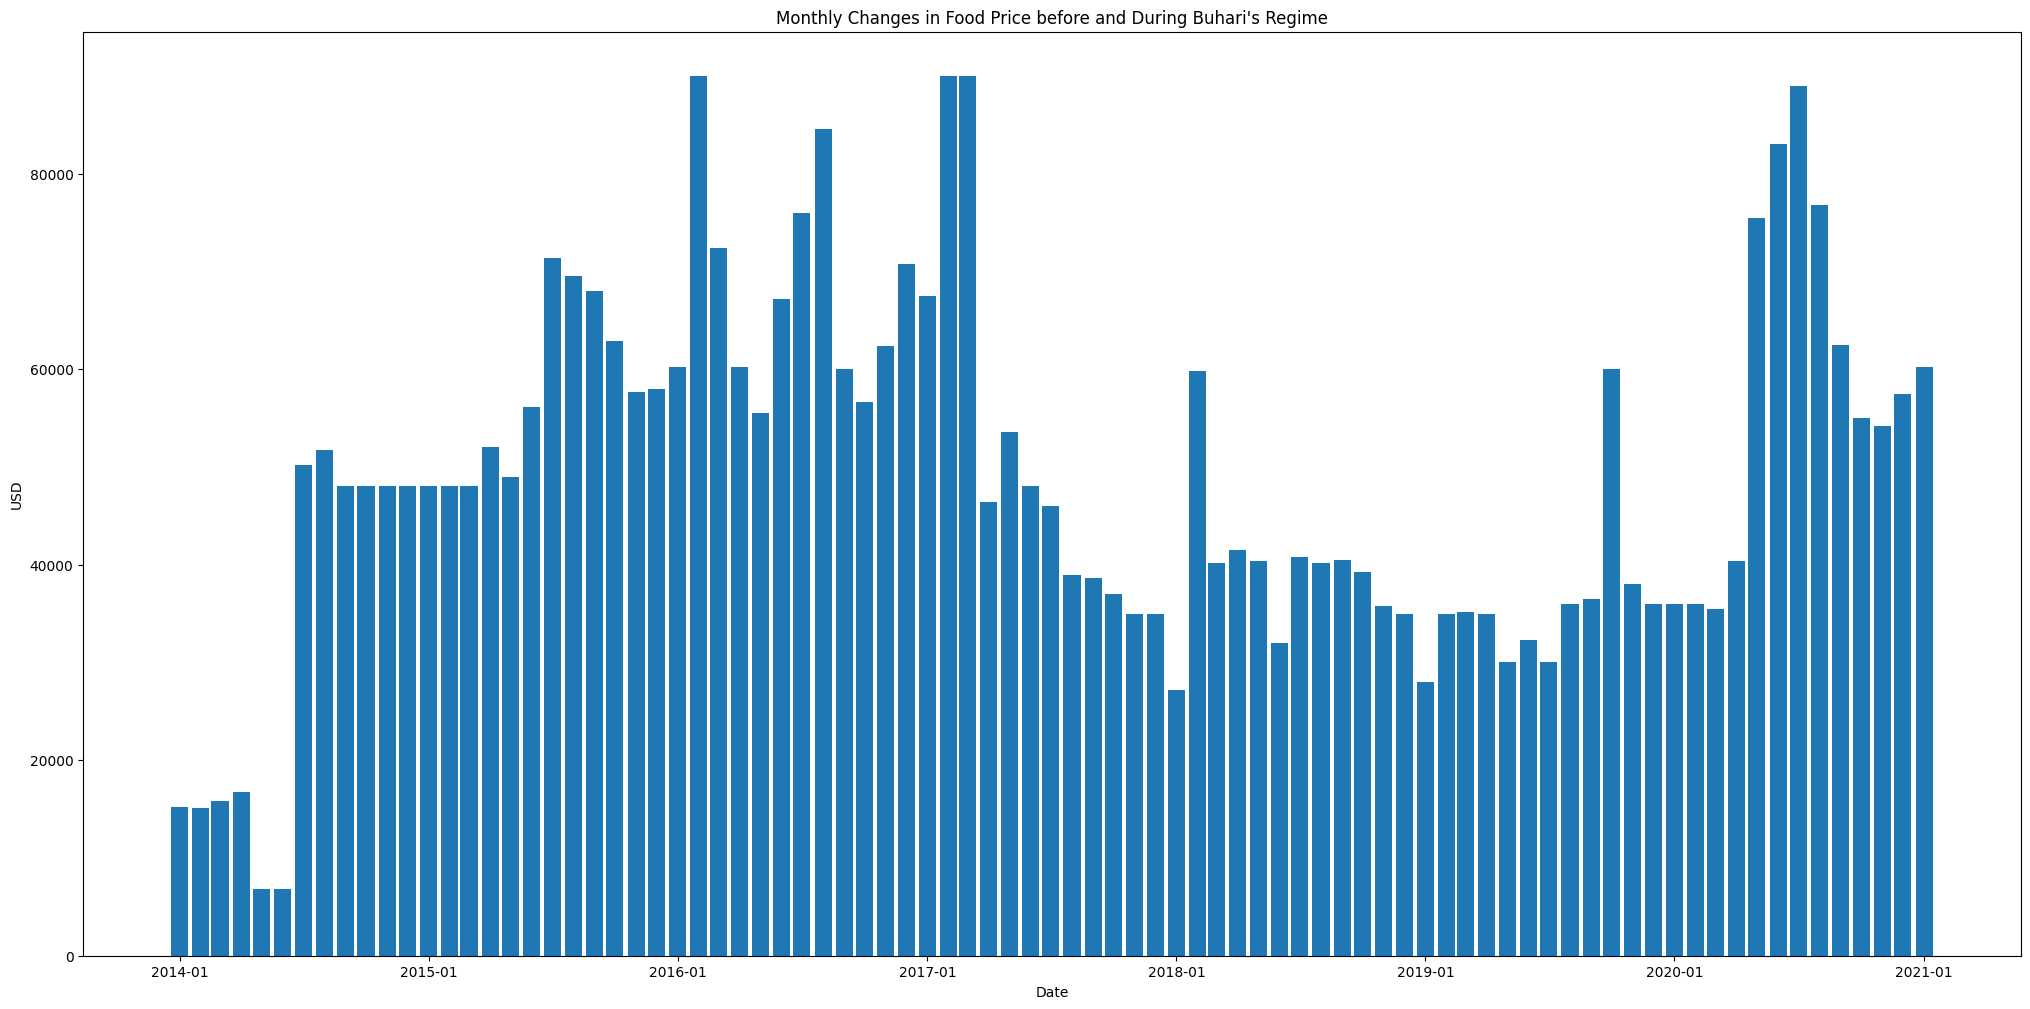

In [ ]:
# Analyze the Monthly Change in mp_price
usd_month = df_nigeria_buhari.resample("M").mean()
fig, ax = plt.subplots(figsize=(25, 12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.bar(df_nigeria_buhari.index, df_nigeria_buhari["mp_price"], width=25, align='center')
ax.set_ylabel("USD")
ax.set_xlabel('Date')
ax.set_title("Monthly Changes in Food Price before and During Buhari's Regime")

Text(0.5, 1.0, "Top 20 Comomodities reported in Nigeria just before and during Buhari's Regime")

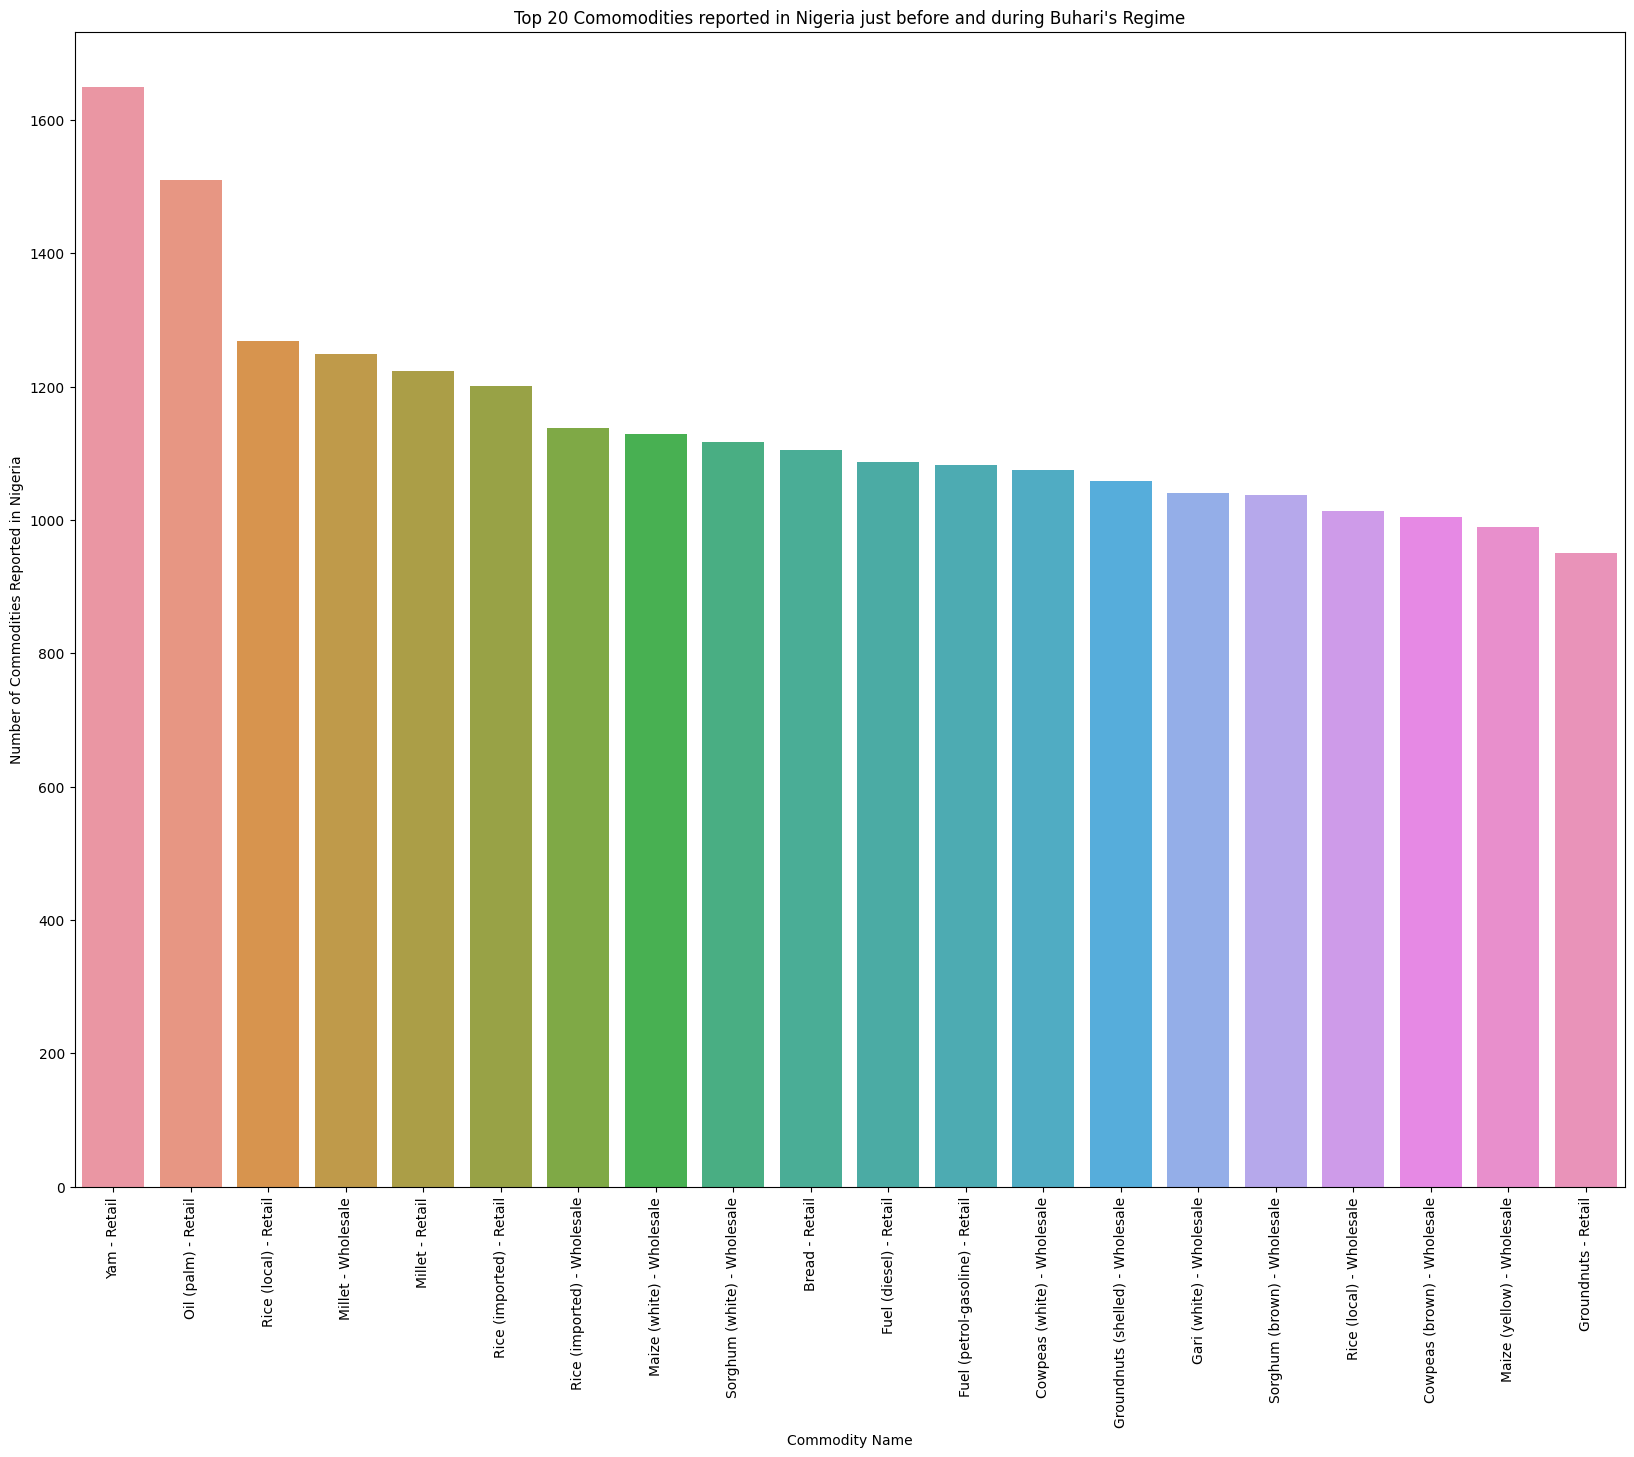

In [ ]:
# Top 20 most reported commodity in Nigeria

fig, ax = plt.subplots(1, 1, figsize=(20, 15), sharex=True)
top_20_df = df_nigeria_buhari[["adm0_id", "cm_name"]].groupby("cm_name").agg(['count'])["adm0_id"]['count'].sort_values(ascending=False)[:20]
fig = sns.barplot( x = top_20_df.index, y = top_20_df.values, ax=ax)
fig.set_xticklabels(labels=top_20_df.index , rotation=90)
fig.set_ylabel("Number of Commodities Reported in Nigeria")
fig.set_xlabel("Commodity Name")
fig.set_title("Top 20 Comomodities reported in Nigeria just before and during Buhari's Regime")

In [ ]:
df_nigeria

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
Date,,,,,,,,,,,,,,,,,,
2015-01-01,182.0,Nigeria,2211,Adamawa,1980,Mubi,55,Bread - Retail,0.0,NGN,15,Retail,33,Unit,1,2015,140.0,NaN
2015-02-01,182.0,Nigeria,2211,Adamawa,1980,Mubi,55,Bread - Retail,0.0,NGN,15,Retail,33,Unit,2,2015,140.0,NaN
2015-03-01,182.0,Nigeria,2211,Adamawa,1980,Mubi,55,Bread - Retail,0.0,NGN,15,Retail,33,Unit,3,2015,140.0,NaN
2015-04-01,182.0,Nigeria,2211,Adamawa,1980,Mubi,55,Bread - Retail,0.0,NGN,15,Retail,33,Unit,4,2015,140.0,NaN
2015-05-01,182.0,Nigeria,2211,Adamawa,1980,Mubi,55,Bread - Retail,0.0,NGN,15,Retail,33,Unit,5,2015,140.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-01,182.0,Nigeria,65710,Zamfara,1977,Kaura Namoda,592,"Rice (milled, local) - Wholesale",0.0,NGN,14,Wholesale,22,50 KG,12,2019,24575.0,NaN
2020-01-01,182.0,Nigeria,65710,Zamfara,1977,Kaura Namoda,592,"Rice (milled, local) - Wholesale",0.0,NGN,14,Wholesale,22,50 KG,1,2020,27485.0,NaN
2020-02-01,182.0,Nigeria,65710,Zamfara,1977,Kaura Namoda,592,"Rice (milled, local) - Wholesale",0.0,NGN,14,Wholesale,22,50 KG,2,2020,27700.0,NaN


In [ ]:
df_month= df_nigeria.loc['2014-01-01':'2021-01-01'].resample("M").mean()

<ipython-input-34-02abeac353e6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_month= df_nigeria.loc['2014-01-01':'2021-01-01'].resample("M").mean()


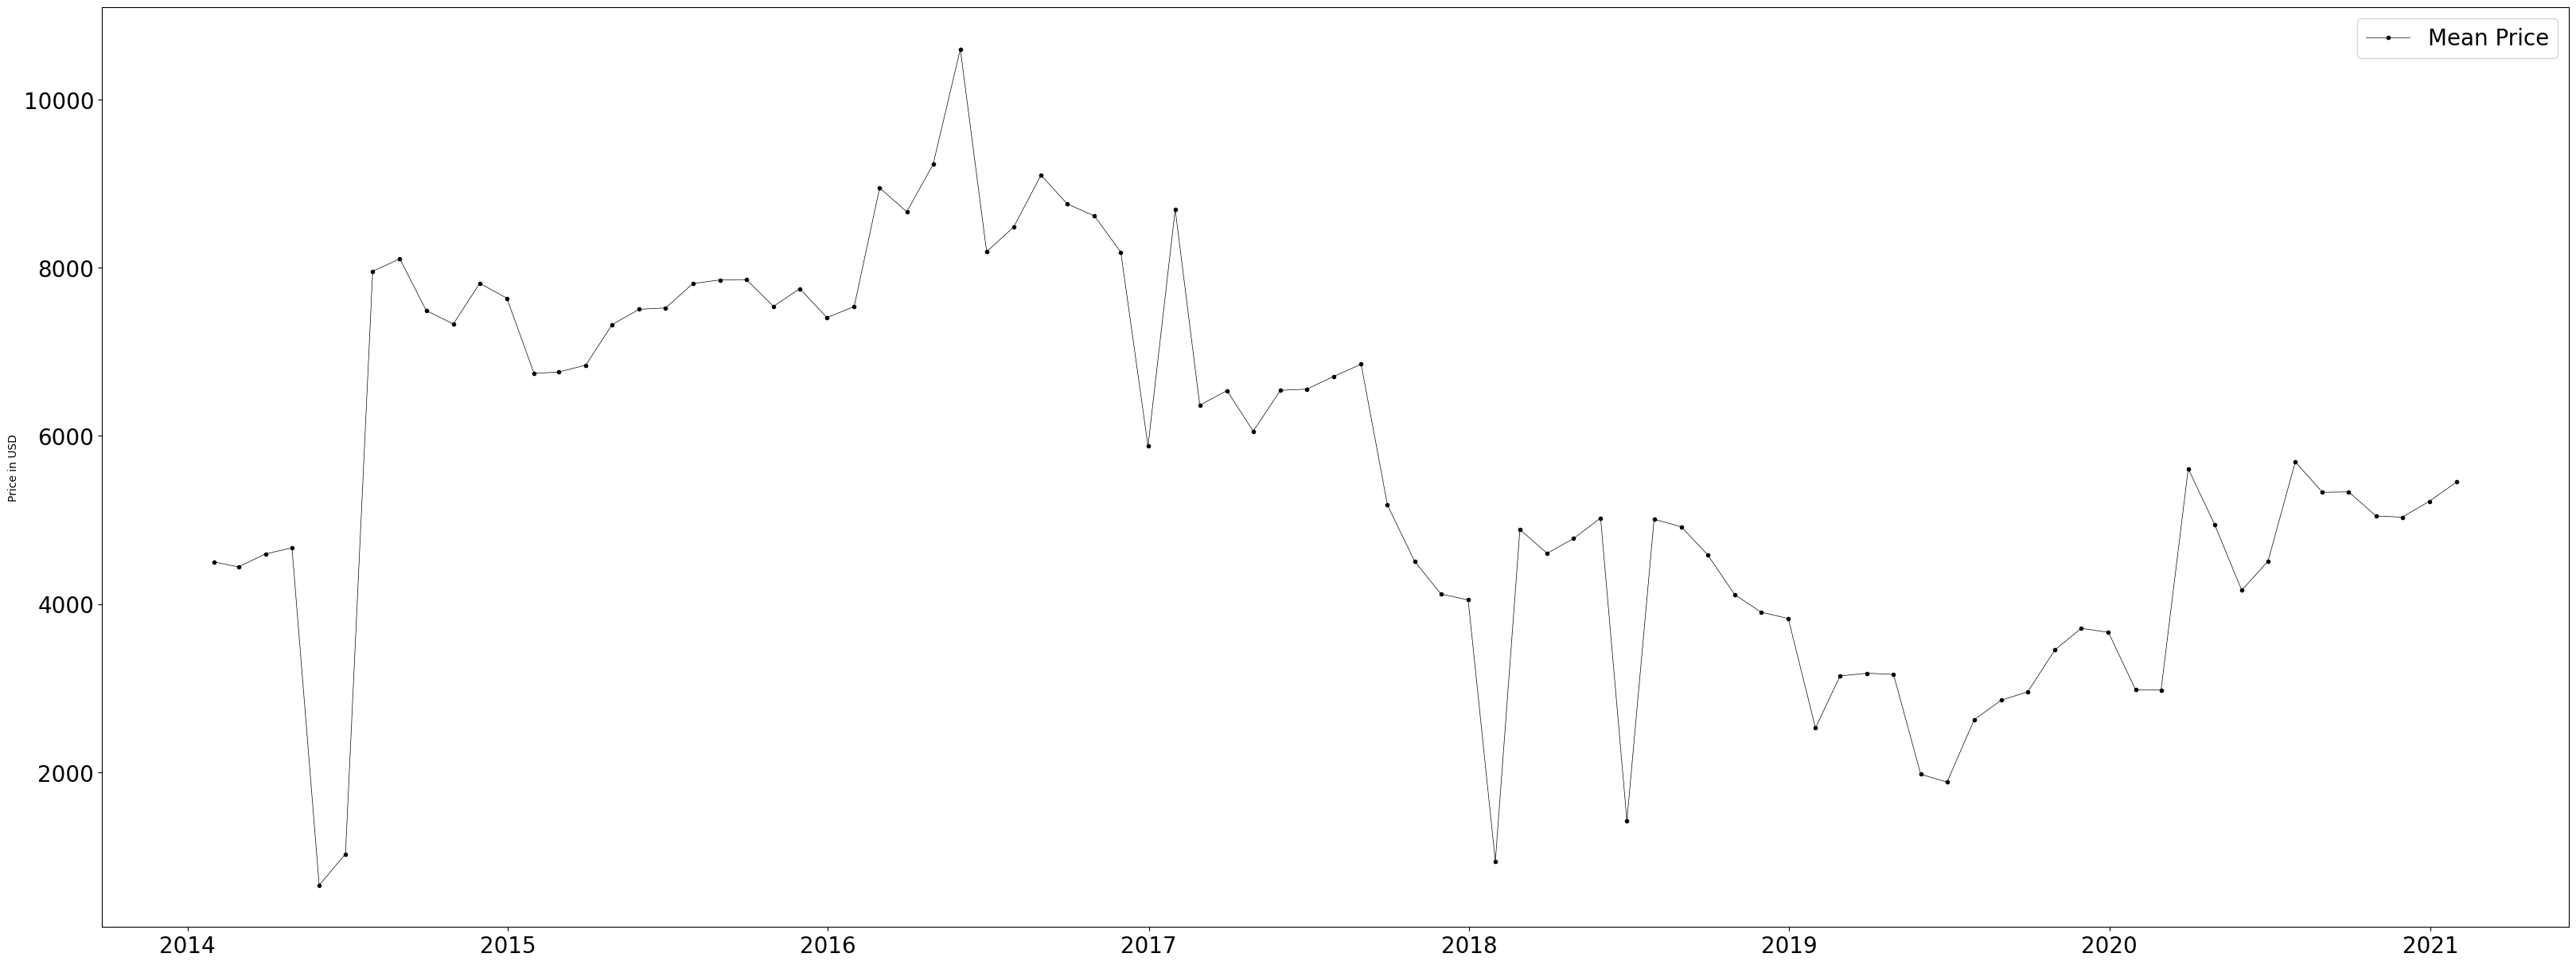

In [ ]:
# Comparing Average plots from 2019 to 2021of Food prices in Sri Lanka

fig, ax = plt.subplots(figsize=(40, 15))
ax.plot(df_month["mp_price"], marker='.', linestyle='-', linewidth = 0.5, label='Mean Price', color='black')
ax.set_ylabel("Price in USD")
plt.tick_params(labelsize=20)
ax.legend(prop={"size":20});